# The spark foundation

## Task : 1, Prediction using supervised ML

### Dataset link : http://bit.ly/w-data

### Name of the author : Parth Sevak



In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

### Getting insights from the data 

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Shape of data set
print( " Dataset has : ", df.shape[0] , " Rows ")
print( " Dataset has : ", df.shape[1] , " Columns ")

 Dataset has :  25  Rows 
 Dataset has :  2  Columns 


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


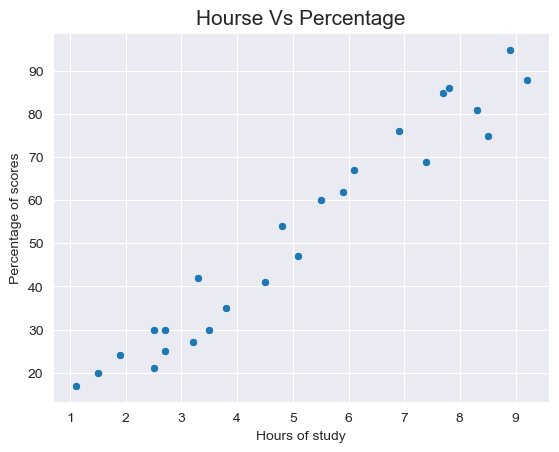

In [10]:
# Plotting distribuitions of score
sns.set_style("darkgrid")
X = df["Hours"]
y = df["Scores"]
sns.scatterplot(x=X, y=y)
plt.title("Hourse Vs Percentage", fontsize = 15)
plt.xlabel("Hours of study", fontsize = 10)
plt.ylabel("Percentage of scores", fontsize = 10)
plt.show()

### From the graph above we can see that hours of study and percentage have a linear relationship in the positive direction

########################################################################

### Now splitting the data into X ( input ) and y ( output )

In [20]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

In [61]:
print( " X train : " , X_train.shape)
print( " X test : ", X_test.shape)
print(" y train : ", y_train.shape)
print( " y test : " , y_test.shape)

 X train :  (20, 1)
 X test :  (5, 1)
 y train :  (20,)
 y test :  (5,)


### applying the model on the splitted data

In [62]:
reg = LinearRegression()

In [63]:
reg.fit(X_train,y_train)

LinearRegression()

In [64]:
print(reg.score(X_train, y_train))

0.9528277512045826


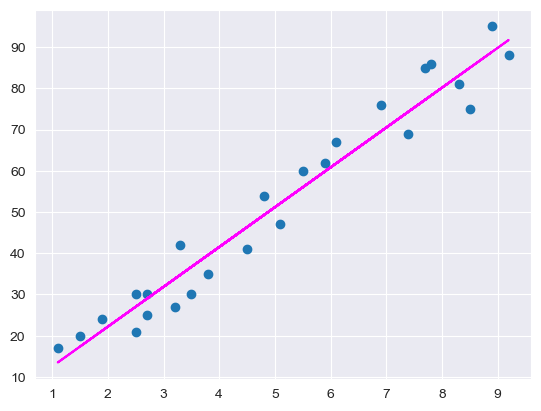

In [65]:
line = reg.coef_*X+reg.intercept_

plt.scatter(X,y)
plt.plot(X, line, color="magenta")
plt.show()


In [66]:
y_pred = reg.predict(X_test)


In [67]:
predicted_per=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
predicted_per

,Actual,predicted
0,69,74.340065
1,60,55.994958
2,67,61.788150
3,47,52.132830
4,95,88.823045


In [68]:
user_hours = [[9.25]]
user_prediction = reg.predict(user_hours)
print( " Based on {} hours studied, user will get a score of {}".format(user_hours, user_prediction))

 Based on [[9.25]] hours studied, user will get a score of [92.20240665]


In [69]:
# we will check for another 

user_hours = [[5.5]]
user_prediction = reg.predict(user_hours)
print( " Based on {} hours studied, user will get a score of {}".format(user_hours, user_prediction))

 Based on [[5.5]] hours studied, user will get a score of [55.9949579]


### Validating the model 

In [70]:
# Evaluating the model
print("Mean absolute error: " , metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  5.173348586293498


## Thus for 9.25 hours of study, a student will get 92.2 percent